In [1]:
import datetime              as dt
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt

In [2]:
#downloading product orders dataset. to first trials.
df = pd.read_csv('https://bsa-correlation-one.s3.amazonaws.com/202003131045_orders.csv')
df.head(5)

/Users/leonardogomescardoso/opt/anaconda3/envs/case_7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city
0,2019-07-20 11:19:43,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6952202281890,PRDWRHUYLLMFX2U0,mercadolivre,mercadolivre,82.99,20.86,0.0,0.20,0.20,1109010,SP,SAO PAULO,89265575,SC,Jaraguá do Sul
1,2019-11-11 20:43:23,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,119.90,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,06040470,SP,Osasco
2,2020-03-01 16:25:00,c58b83e5-52de-43fe-8399-a7bc312e2aa5,7898907175302,PRDKTDU50G9FVV57,cnova,ex,39.90,14.24,0.0,0.19,0.19,20910970,RJ,RIO DE JANEIRO,22260210,RJ,Rio de Janeiro
3,2020-02-04 12:04:10,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,130.95,0.00,0.0,0.20,0.20,1109010,SP,SAO PAULO,89062100,SC,Blumenau
4,2018-12-14 13:52:19,a97001a2-a7d2-4bd6-b0d5-1da2a2b8abd9,6951003643197,PRDACYVT895VMO7H,mercadolivre,mercadolivre,128.99,21.51,0.0,0.20,0.20,1109010,SP,SAO PAULO,66055000,PA,Belém


In [3]:
#checking range of dates aka 'purchase_timestamp'
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])  
df['date'] = df['purchase_timestamp'].dt.date
df.sort_values('purchase_timestamp').iloc[[0,-1]]

,purchase_timestamp,seller_id,product_gtin,product_sku,channel_slug,channel_store,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip,origin_state,origin_city,destination_zip,destination_state,destination_city,date
24613,2015-09-23 13:00:13,ae3537b0-1bba-4690-8219-d4be662e1f6a,7899893323067,OLT1FE68051DD0E,cnova,cnova,168.00,0.0,0.0,0.20,0.00,5138100,SP,São Paulo,95720000,RS,Garibaldi,2015-09-23
36494,2020-03-13 07:37:36,5fc08652-2e29-45c8-a967-428d73dd35e0,7897181941436,PRD4ZU8AMTULO709,mercadolivre,mercadolivre,94.05,0.0,0.0,0.16,0.16,6422120,SP,Barueri,24210200,RJ,Niterói,2020-03-13


In [4]:
df.describe()

,product_gtin,price,freight_value,price_freight_shift,commission_product_olist,commission_freight_olist,origin_zip
count,4.099700e+04,40997.000000,40997.000000,40997.000000,40997.000000,40997.000000,4.099700e+04
mean,7.770114e+12,110.292697,18.431204,0.110380,0.192374,0.188754,2.015039e+07
std,3.374423e+12,139.258356,17.080063,1.511568,0.016219,0.030310,2.292874e+07
min,1.789851e+11,6.920000,0.000000,0.000000,0.090000,0.000000,1.021200e+06
25%,7.892509e+12,35.130000,8.530000,0.000000,0.190000,0.190000,4.782020e+06
50%,7.898555e+12,71.900000,16.220000,0.000000,0.200000,0.200000,1.308726e+07
75%,7.908244e+12,134.900000,23.110000,0.000000,0.200000,0.200000,2.494152e+07
max,7.891190e+13,5079.940000,344.700000,72.900000,0.250000,0.250000,9.950000e+07


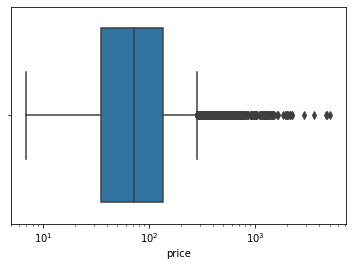

In [5]:
g = sns.boxplot(df['price'])
g.set_xscale('log')

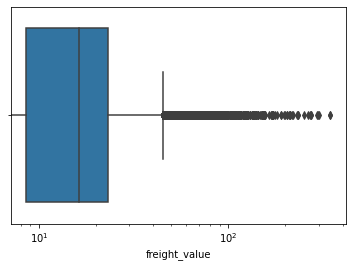

In [6]:
g = sns.boxplot(df['freight_value'])
g.set_xscale('log')

In [7]:
#Looking for the most frequent orders bby gtin.
#Here, we don't have the information of how many units was each order.
#As at least one product was sold at each order, I considered that I sell one product by order.
#I choose an random column to count the rows and identify how many orders we have for each gtin

df_ordersbygtin = df.groupby(by=['product_gtin'])['seller_id'].count().sort_values(ascending = False).to_frame().rename(columns={'seller_id': 'n_orders'})
df_ordersbygtin = df_ordersbygtin.reset_index()
df_ordersbygtin['share'] = df_ordersbygtin['n_orders']/df_ordersbygtin['n_orders'].sum() * 100
df_ordersbygtin['rank'] = df_ordersbygtin['share'].rank(method = 'first', ascending = False).astype(int)
df_ordersbygtin.head()

,product_gtin,n_orders,share,rank
0,8800550956404,2859,6.973681,1
1,7899495703106,2079,5.071103,2
2,7909389621864,1999,4.875967,3
3,7895099385786,1652,4.029563,4
4,7892049060281,1614,3.936873,5


In [8]:
#creating a new df group by date instead of datetime
df_date = df.groupby(['product_gtin', 'date']).agg({'purchase_timestamp': 'count', 'price' : 'median'}).rename(columns={'purchase_timestamp': 'n_orders', 'price': 'price_median'})
df_date = df_date.reset_index()
df_date.head()

,product_gtin,date,n_orders,price_median
0,178985123004,2019-03-05,1,74.25
1,178985123004,2019-03-21,1,70.28
2,178985123004,2019-03-25,1,70.28
3,178985123004,2019-04-08,1,70.28
4,178985123004,2019-04-09,1,70.28


In [9]:
df_date = df_date.merge(df_ordersbygtin[['product_gtin','rank']], left_on='product_gtin', right_on='product_gtin')
df_date.head()

,product_gtin,date,n_orders,price_median,rank
0,178985123004,2019-03-05,1,74.25,154
1,178985123004,2019-03-21,1,70.28,154
2,178985123004,2019-03-25,1,70.28,154
3,178985123004,2019-04-08,1,70.28,154
4,178985123004,2019-04-09,1,70.28,154


In [12]:
df_date[df_date['rank']==1]

,product_gtin,date,n_orders,price_median,rank
18055,8800550956404,2018-06-17,1,59.9,1
18056,8800550956404,2018-07-24,1,59.9,1
18057,8800550956404,2018-07-29,1,59.9,1
18058,8800550956404,2018-08-03,1,59.9,1
18059,8800550956404,2018-08-05,2,59.9,1
...,...,...,...,...,...
18438,8800550956404,2020-03-06,10,35.0,1
18439,8800550956404,2020-03-07,8,35.0,1
18440,8800550956404,2020-03-08,8,35.0,1
18441,8800550956404,2020-03-09,14,35.0,1


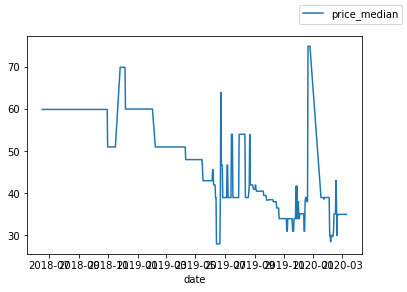

In [16]:
ax = df_date[df_date['rank']==1].plot(x="date", y="price_median", legend=False)
#ax2 = ax.twinx()
#df_date['rank']==1].plot(x="date", y="n_orders", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()